<a href="https://colab.research.google.com/github/ghozzzzzz/Machine-Learning/blob/main/Latihan_bang_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("covid_19_indonesia_time_series_all.csv")
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30893 entries, 0 to 31820
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         30893 non-null  object 
 1   Location ISO Code            30893 non-null  object 
 2   Location                     30893 non-null  object 
 3   New Cases                    30893 non-null  int64  
 4   New Deaths                   30893 non-null  int64  
 5   New Recovered                30893 non-null  int64  
 6   New Active Cases             30893 non-null  int64  
 7   Total Cases                  30893 non-null  int64  
 8   Total Deaths                 30893 non-null  int64  
 9   Total Recovered              30893 non-null  int64  
 10  Total Active Cases           30893 non-null  int64  
 11  Location Level               30893 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province             

In [37]:
data['Date'].unique()

array(['3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020',
       '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020',
       '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020',
       '3/26/2020', '3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020',
       '3/31/2020', '4/1/2020', '4/2/2020', '4/3/2020', '4/4/2020',
       '4/5/2020', '4/6/2020', '4/7/2020', '4/8/2020', '4/9/2020',
       '4/10/2020', '4/11/2020', '4/12/2020', '4/13/2020', '4/14/2020',
       '4/15/2020', '4/16/2020', '4/17/2020', '4/18/2020', '4/19/2020',
       '4/20/2020', '4/21/2020', '4/22/2020', '4/23/2020', '4/24/2020',
       '4/25/2020', '4/26/2020', '4/27/2020', '4/28/2020', '4/29/2020',
       '4/30/2020', '5/1/2020', '5/2/2020', '5/3/2020', '5/4/2020',
       '5/5/2020', '5/6/2020', '5/7/2020', '5/8/2020', '5/9/2020',
       '5/10/2020',

In [6]:
last_date= '9/16/2022'
data[data['Date']==last_date]

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [29]:
unique_Province = data[data['Total Cases']>0]['Province'].unique()
unique_Province.sort()
unique_Province

array(['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DKI Jakarta',
       'Daerah Istimewa Yogyakarta', 'Gorontalo', 'Jambi', 'Jawa Barat',
       'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat',
       'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur',
       'Kalimantan Utara', 'Kepulauan Bangka Belitung', 'Kepulauan Riau',
       'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara'], dtype=object)

In [30]:
Province_total_case = []
for i in unique_Province:
  Province_total_case.append(data[(data['Total Cases']>0)&(data['Province']==i)]['Total Cases'].sum())

In [31]:
print(set(zip(unique_Province, Province_total_case)))

{('Bali', 66247623), ('Jawa Timur', 239912685), ('Bengkulu', 12347482), ('Sulawesi Barat', 6865029), ('Kepulauan Bangka Belitung', 26613493), ('Kalimantan Selatan', 39485248), ('Gorontalo', 6746166), ('Daerah Istimewa Yogyakarta', 86090207), ('Riau', 68594950), ('Sulawesi Selatan', 66922249), ('Sumatera Utara', 60912221), ('Kepulauan Riau', 29043850), ('Kalimantan Barat', 23403342), ('Sulawesi Tengah', 24193556), ('Sulawesi Tenggara', 12244125), ('Sulawesi Utara', 21715953), ('Jawa Tengah', 273046506), ('Jambi', 15700629), ('Kalimantan Utara', 18782628), ('Aceh', 19962180), ('DKI Jakarta', 545806047), ('Jawa Barat', 439196053), ('Kalimantan Timur', 89582475), ('Nusa Tenggara Timur', 34710372), ('Papua Barat', 13634548), ('Sumatera Barat', 49292155), ('Maluku Utara', 6781984), ('Kalimantan Tengah', 25507275), ('Nusa Tenggara Barat', 15887423), ('Sumatera Selatan', 34483096), ('Maluku', 9046656), ('Papua', 22285548), ('Lampung', 28891786), ('Banten', 100598017)}


In [32]:
nan_indices = []
for i in range(len(unique_Province)):
  if type(unique_Province[i])==float:
    nan_indices.append[i]

In [33]:
unique_Province = list(unique_Province)
Province_total_case = list(Province_total_case)

In [34]:
for i in nan_indices:
  unique_Province.pop(i)
  Province_total_case.pop(i)

unique_Province

['Aceh',
 'Bali',
 'Banten',
 'Bengkulu',
 'DKI Jakarta',
 'Daerah Istimewa Yogyakarta',
 'Gorontalo',
 'Jambi',
 'Jawa Barat',
 'Jawa Tengah',
 'Jawa Timur',
 'Kalimantan Barat',
 'Kalimantan Selatan',
 'Kalimantan Tengah',
 'Kalimantan Timur',
 'Kalimantan Utara',
 'Kepulauan Bangka Belitung',
 'Kepulauan Riau',
 'Lampung',
 'Maluku',
 'Maluku Utara',
 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur',
 'Papua',
 'Papua Barat',
 'Riau',
 'Sulawesi Barat',
 'Sulawesi Selatan',
 'Sulawesi Tengah',
 'Sulawesi Tenggara',
 'Sulawesi Utara',
 'Sumatera Barat',
 'Sumatera Selatan',
 'Sumatera Utara']

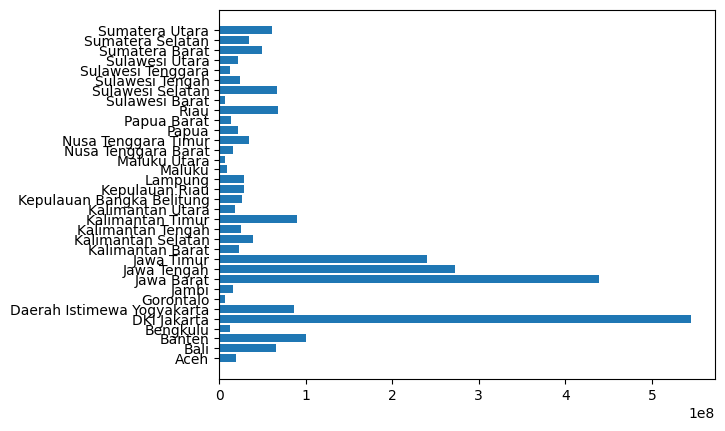

In [35]:
plt.barh(unique_Province, Province_total_case)
plt.show()

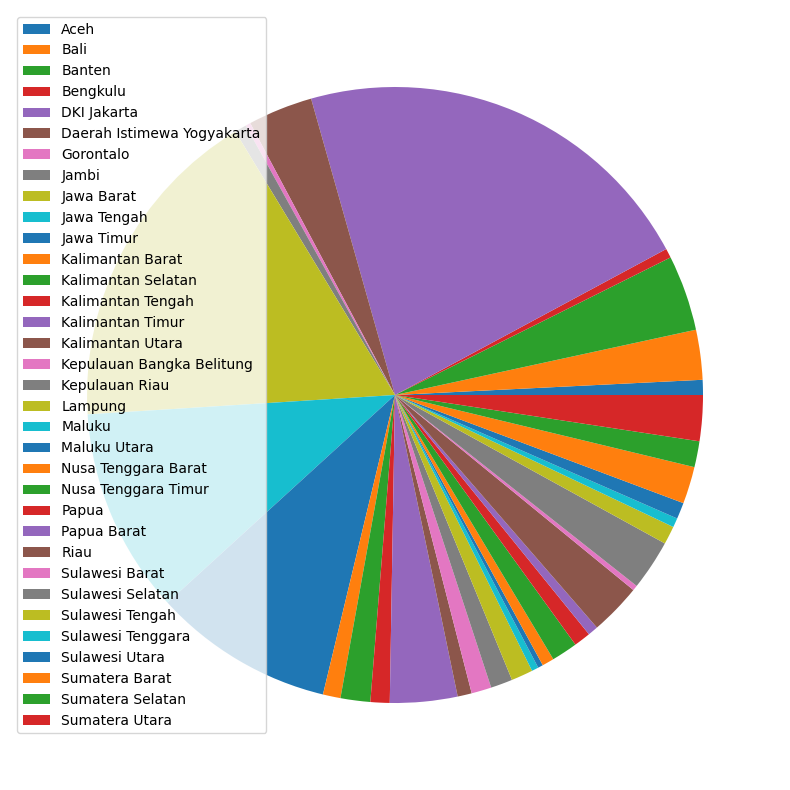

In [36]:
plt.figure(figsize=(10,10))
plt.pie(Province_total_case)
plt.legend(unique_Province, loc='best')
plt.show()